# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #03</span>

Lo scopo principale di questa terza esercitazione era introdurre il concetto di **Moto Browniano** (BM) o processo di Wiener, definito come un Random Walk (e quindi processo stocastico di Markov privo di memoria) caratterizzato da incrementi distribuiti in modo normale. Quindi, generando un insieme di variabil casuali $Z_i$ associate ad una distribuzione di propabilità $N(0;1)$, è possibile campionare un Moto Browniano (non standard) $W(t) \sim BM(\mu;\sigma)$ nel modo seguente:

$$W(t_{i+1}) = W(t_i) + \mu (t_{i+1} - t_i) + Z_{i+1}\sqrt{t_{i+1} - t_i} \;,\;\;\; i = 0,1,...$$

dove $\mu$ e $\sigma$ sono due costanti. In particolare, all'interno dell'esercitazione, ci siamo concentrati principalmente su una variante del processo di Wiener, ovvero il concetto di Moto Browniano Geometrico (**GBM**) e abbiamo approfondito una sua importante applicazione all'interno di un campo apparentemente esotico: il mercato finanziario (nello specifico si parla di **econofisica**). Durante la lezione teorica abbiamo infatti visto che una prima e semplificata modellizzazione dell'andamento dei mercati finanziari può essere ottenuta, sotto le assunzioni di Markov, come combinazione di un contributo deterministico e uno randomico. Quello che si ottiene è appunto un processo stocastico $S(t)$, il cui logaritmo soddisfa l'equazione differenziale tipica di un processo di Wiener. A partire da questo fatto, è possibile dimostrare che un Moto Browniano Geometrico può essere campionato utilizzando una formula del seguente tipo:

$$S(t_{i+1}) = S(t_i) \exp{ \left[ \left(\mu - \frac{1}{2}\sigma^2 \right) \left(t_{i+1} - t_i \right) + \sigma Z_{i+1}\sqrt{t_{i+1} - t_i} \right]}$$

dove il parametro $\mu$ è detto *drift* e, nel nostro caso, rappresenta il tasso di interesse, mentre $\sigma$ è chiamata *volatilità* e  permette di descrivere il peso delle fluttuazioni statistiche sul prezzo $S(t)$.

### <span style="color:darkorange"> Esercizio 03.1</span>

L'esercizio consisteva nella simulazione, via metodi Monte Carlo, di un modello finanziario descritto dalla **Teoria di Black-Scholes**. A lezione abbiamo visto che questa teoria è basata su un'assunzione fondamentale, ovvero il fatto che l'evoluzione temporale del prezzo di un bene sia stocastica ed, in particolare, che segua un moto browniano geometrico con tasso d'interesse libero da rischi $r$ e volatilità $\sigma$, entrambi costanti. In questo caso particolare abbiamo visto esistere una soluzione analitica esplicita del problema, che ci permette quindi di conoscere esattamente il valore del *European Call-option price* $C\left[ S(t),t \right]$ e del *European Put-option price* $P\left[ S(t),t \right]$ ad ogni tempo $t\leq T$, dove $T$ rappresenta il momento in corrispondenza del quale il *writer* è obbligato dall'opzione a vendere o comprare il bene concordato. Di seguito sono riportati i risultati ottenuti da Black e Scholes:

$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$

$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove

$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$

Nello specchietto Python sottostante, ho implementato queste funzioni analitiche in modo da poter conforntare i risultati della simulazione con quelli attesi.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

Lo svolgimento dell'esercizio prevedeva la simulazione dell'andamento temporale del prezzo $S(t)$ con lo scopo di stimare il valore finale di $C\left[ S(t),t \right]$ e $P\left[ S(t),t \right]$ al tempo $t=T$ (nel nostro caso $T=1$). Questo processo doveva essere simulato in due modi ben distinti:

1. Tramite il campionamento **diretto** del prezzo finale $S(T)$ per un $GBM(\mu;\sigma)$;
2. Attraverso un campionamento **discreto** della variabile $S(t) \sim GBM(\mu;\sigma)$, ottenuto dividendo l'intervallo $[0,T]$ in $100$ step ($i.e.$ $S(t_i)$ per $i = 1,2,...,100$).

Per implementare il primo punto all'interno del mio codice è bastato campionare una variabile $Z \sim N(0;1)$  e da questa ho calcolato direttamente $S(T)$, utilizzando la formula riportata nell'introduzione e ponendo come tempo iniziale $t=0$.

$$S(T) = S(0) \exp{ \left[ \left(r - \frac{1}{2}\sigma^2 \right) T + \sigma Z\sqrt{T} \right]}$$

dove si è posto
- $S(0) = 100$ ;
- $r = 0.1$ ;
- $\sigma = 0.25$ .

Ripetendo questa simulazione un numero $M = 10^4$ di volte, ho calcolato valor medio e incertezza statistica di $C\left[ S(T),T \right]$ e $P\left[ S(T),T \right]$ applicando il Block Method con un numero di blocchi $N=100$ e ho studiato l'andamento di queste quantità in funzione del numero di blocchi utilizzati.

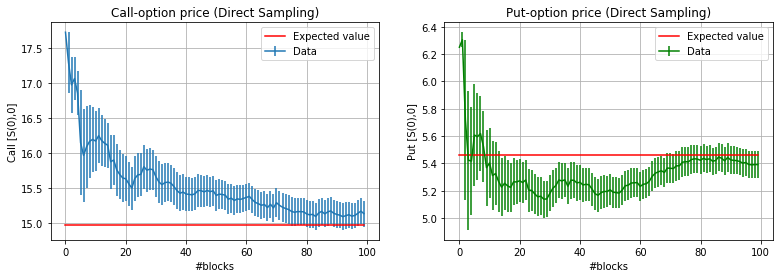

In [3]:
call, put = black_scholes(S0, K, T, r, sigma)

nblocks=100
x = np.arange(nblocks)
real_call = np.zeros(nblocks) + call
real_put = np.zeros(nblocks) + put

callDir,err_callDir,putDir,err_putDir = np.loadtxt("Esercizio3.1/direct.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(x,callDir,err_callDir,label='Data')
plt.xlabel('#blocks')
plt.ylabel('Call [S(0),0]')
plt.title('Call-option price (Direct Sampling)')
plt.grid(True)
plt.plot(x,real_call,color='r',label='Expected value')
plt.legend()

plt.subplot(132)
plt.errorbar(x,putDir,err_putDir,color='g',label='Data')
plt.xlabel('#blocks')
plt.ylabel('Put [S(0),0]')
plt.title('Put-option price (Direct Sampling)')
plt.grid(True)
plt.plot(x,real_put,color='r',label='Expected value')
plt.legend()

plt.show()


Come si può osservare dai plot, i valori medi ottenuti tendono a convergere verso i valori attesi ricavati per via analitica.

Per quanto riguarda la seconda parte dell'esercizio, come detto sopra, ho dovuto ricavare il valore del prezzo $S(t)$ al tempo finale $T$ campionando in modo discreto la sua evoluzione temporale nell'intervallo $[0,T]$. Ho quindi costruito un processo stocastico attraverso la seguente legge ricorsiva:

$$\begin{cases} S(t_{i+1}) = S(t_i) \exp{ \left[ \left(r - \frac{1}{2}\sigma^2 \right) \left(t_{i+1} - t_i \right) + \sigma Z_{i+1}\sqrt{t_{i+1} - t_i} \right]} \;,\;\;\; i = 0,1,2,...,100 \\ S(t_0 = 0) = 100 \end{cases}$$

Ho ripetuto nuovamente la simulazione $M=10^4$ volte e ho calcolato il valore medio ed incertezza statistica di $C\left[ S(T),T \right]$ e $P\left[ S(T),T \right]$, applicando il consueto metodo a blocchi.

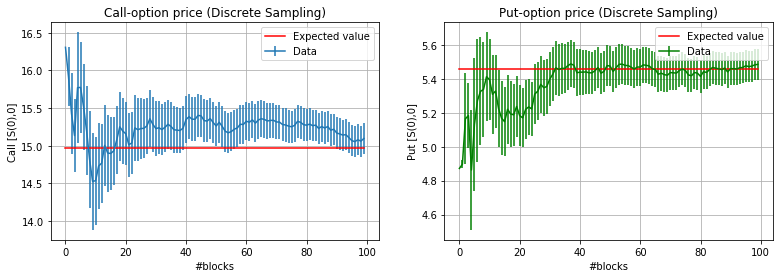

In [4]:
callDis,err_callDis,putDis,err_putDis=np.loadtxt("Esercizio3.1/discrete.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(x,callDis,err_callDis,label='Data')
plt.xlabel('#blocks')
plt.ylabel('Call [S(0),0]')
plt.title('Call-option price (Discrete Sampling)')
plt.grid(True)
plt.plot(x,real_call,color='r',label='Expected value')
plt.legend()

plt.subplot(132)
plt.errorbar(x,putDis,err_putDis,color='g',label='Data')
plt.xlabel('#blocks')
plt.ylabel('Put [S(0),0]')
plt.title('Put-option price (Discrete Sampling)')
plt.grid(True)
plt.plot(x,real_put,color='r',label='Expected value')
plt.legend()

plt.show()

Anche in questo caso, i valori medi ottenuti dalla simulazione convergono ai valori attesi ricavati analiticamente.